In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'wordcloud'

In [2]:
df = pd.read_csv("winemag-data-130k-v2.csv", index_col=0)
df

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
0            Kerin O’Keefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine    
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine    
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine    
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer 

In [3]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
                                                                           ", ".join(df.variety.unique()[0:5])))

print("There are {} countries producing wine in this dataset such as {}... \n".format(len(df.country.unique()),
                                                                                      ", ".join(df.country.unique()[0:5])))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [4]:
df[["country", "description","points"]].head()

country                                        description  points
0     Italy  Aromas include tropical fruit, broom, brimston...      87
1  Portugal  This is ripe and fruity, a wine that is smooth...      87
2        US  Tart and snappy, the flavors of lime flesh and...      87
3        US  Pineapple rind, lemon pith and orange blossom ...      87
4        US  Much like the regular bottling from 2012, this...      87

In [5]:
# Groupby by country
country = df.groupby("country")

# Summary statistic of all countries
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

check all required and optional arguments

In [6]:
?WordCloud

In [7]:
# ?plt.plot

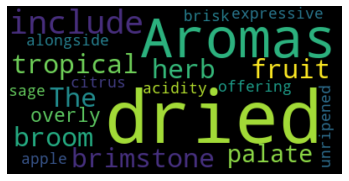

In [8]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

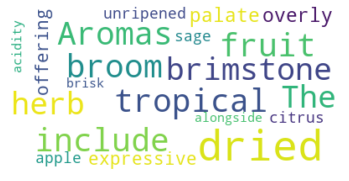

In [9]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

You've probably noticed the argument interpolation="bilinear" in the plt.imshow(). This is to make the displayed image appear more smoothly. For more information about the choice, here is a helpful link to explore more about this choice.

In [10]:
#combine all wine reviews into one big text
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


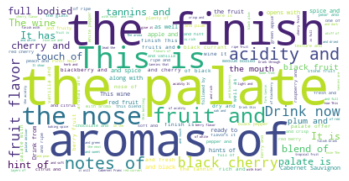

In [11]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "wine", "flavor", "flavors"])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Masks

In [21]:
wine_mask = np.array(Image.open("wine.png"))
wine_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

The way the masking functions works is that it requires all white part of the mask should be 255 not 0 (integer type). This value represents the "intensity" of the pixel. Values of 255 are pure white, whereas values of 1 are black. Here, you can use the provided function below to transform your mask if your mask has the same format as above. Notice if you have a mask that the background is not 0, but 1 or 2, adjust the function to match your mask.

In [13]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [55]:
wine_mask[1,2]

array([0, 0, 0, 0], dtype=uint8)

In [102]:
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1],wine_mask.shape[2]), np.int32)

for i in range(len(wine_mask)):
    for j in range(len(wine_mask[i])):
        transformed_wine_mask[i,j] = list(map(transform_format, wine_mask[i,j]))

In [ ]:
transformed_mask.shape

In [82]:
mask = np.array(Image.open('family-gathering.jpg'))

In [98]:
# Transform your mask into a new one that will work with the function:
transformed_mask = np.ndarray((mask.shape[0],mask.shape[1],mask.shape[2]), np.int32)

for i in range(len(mask)):
    for j in range(len(mask[i])):
        for g in range(len(mask[i,j])):
            transformed_mask[i,j] = list(map(transform_format, mask[i,j]))

In [ ]:
# mask = np.array(Image.open(requests.get(‘http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

In [166]:
img = Image.open('germany.jpg')

mask = np.array(img)

In [168]:
mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57],
        ...,
        [ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57]],

       [[ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57],
        ...,
        [ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57]],

       [[ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57],
        ...,
        [ 40,  47,  57],
        [ 40,  47,  57],
        [ 40,  47,  57]]

In [158]:
t_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)
for i in range(len(mask)):
    for j in range(len(mask[i])):
        if mask[i][j][0] == 0:
            t_mask[i][j] = 255
        else:
            continue

In [159]:
t_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

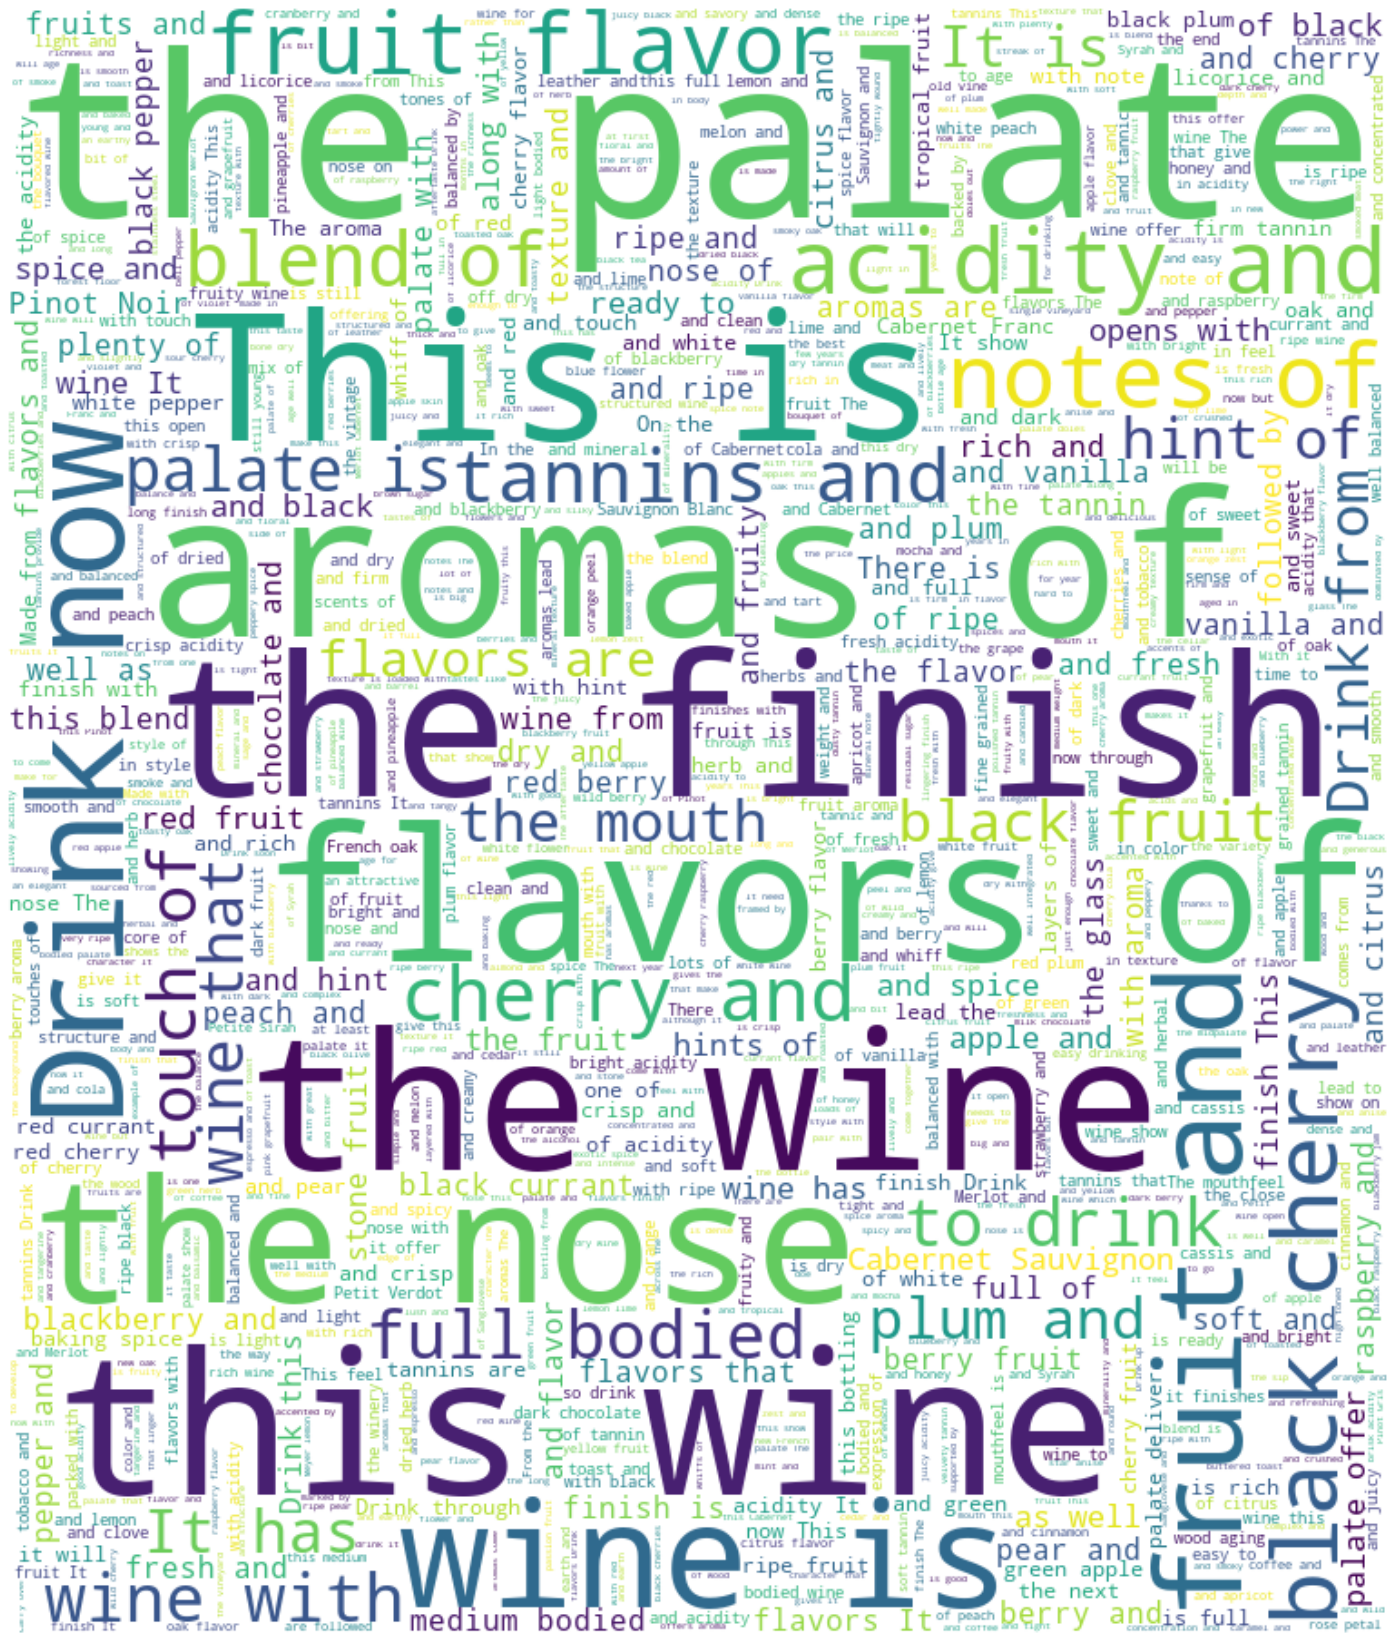

In [169]:
img = Image.open('italy.png')

mask = np.array(img)

def transform_format(val):
    if val ==0:
        return 255
    else:
        return val

# t_mask = np.ndarray((mask.shape[0], mask.shape[1]), np.int32)

# for i in range(len(mask)):
#     t_mask[i] = list(map(transform_format, mask[i]))


# img_color = ImageColorGenerator(t_mask)

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(100, 5%%, %d%%)" % np.random.randint(0,50))

wc = WordCloud(background_color='white', 
               width=1600, 
               height=80,
              mask=mask,
              max_font_size=2000,
              max_words=2000,
              random_state=42)
wcloud = wc.generate(text)
plt.figure(figsize=(30, 30))
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
plt.axis('off')
# plt.imshow(wc.recolor(color_func = grey_color_func), interpolation="bilinear")
plt.imshow(wc, interpolation="bilinear")
# plt.savefig('TEST.png')
plt.show()

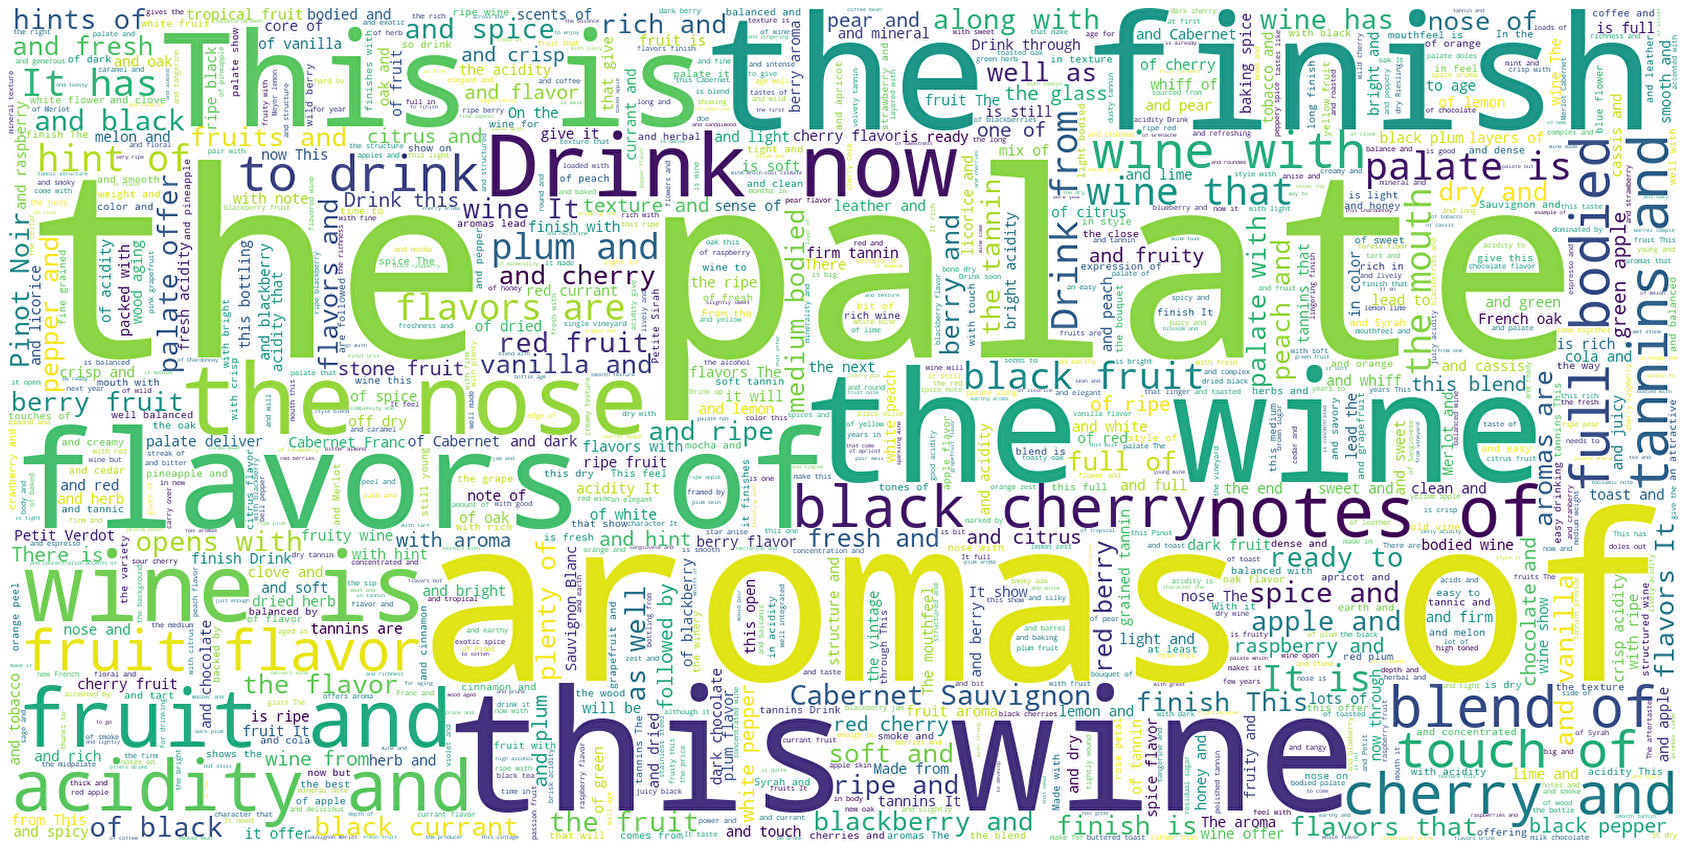

In [164]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, width=1600, height=800,
               stopwords=stopwords, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(text)

# # store to file
# wc.to_file("img/wine.png")

# show
plt.figure(figsize=[30,25])
plt.imshow(wc, interpolation='sinc')
plt.axis("off")
plt.show()

### Thesis

In [3]:
with open ("thesis.txt", "r", encoding='utf-8') as myfile:
    data=myfile.readlines()

In [4]:
test = ','.join(data)

In [5]:
# stopwords

NameError: name 'stopwords' is not defined

In [6]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords = stopwords.update("Fig", "Fig.", "LOD", "using", "as well", "as", "well",'fig','FIG')

# Create a word cloud image
wc = WordCloud(background_color="white", 
               width=1500, 
               height=1000,
               stopwords=stopwords,
               max_words=1000,
              prefer_horizontal=0.8)

# Generate a wordcloud
wc.generate(test)

#color map
# def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
#     return("hsl(100, 5%%, %d%%)" % np.random.randint(0,50))
def custom_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return(f"hsl(322, {np.random.randint(15,100)}%, {np.random.randint(0,50)}%)")

# show
plt.figure(figsize=[50,30])
plt.imshow(wc.recolor(color_func = custom_color_func), interpolation="sinc")
plt.axis("off")

# # store to file
# wc.to_file("wc_thesis_1000_pink_1500_1000_16.png")

plt.show()

NameError: name 'STOPWORDS' is not defined